## Problem statement


In [1]:
## Perform analysis and movie recommendations based on similar Genres and Movies which user perfers

## Required libraries

In [2]:
##Basics libraries

import numpy as np
import pandas as pd
##For data visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py

##For jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

##For interactive displays
from IPython.display import display

##Supress warnings
import warnings
warnings.filterwarnings("ignore")

##Setting up the chart size and background of the visuals
plt.rcParams['figure.figsize']=(16,8)
plt.style.use('fivethirtyeight')
##For any other plt style (plt.style.available)


## let's read  movie dataset

In [3]:
data=pd.read_csv("movie_metadata.csv")

In [4]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [5]:
##check the shape of the dataset
data.shape

(5043, 28)

In [6]:

##checking the datatypes the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
## let's remove the unnecessary columns

data=data.drop(['color',
                'director_facebook_likes',
                'actor_3_facebook_likes',
                'actor_1_facebook_likes',
                'actor_2_facebook_likes',
                'cast_total_facebook_likes',
                'facenumber_in_poster',
                'content_rating',
                'movie_imdb_link',
                'country','aspect_ratio',
                'plot_keywords'],axis=1)               

In [8]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

## Data preprocessing

In [9]:
##checking the percentage of missing values in rows
round(100*data.isnull().sum()/len(data.index),2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [10]:
### Deleting the  corresponding rows for which 'gross' and 'budgets' are having null values.

data=data[~np.isnan(data["gross"])]
data=data[~np.isnan(data["budget"])]

In [11]:
##checking  again the missing values left in any column
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [12]:
##filling the missing values

## for numerical values
data["num_critic_for_reviews"].fillna(data["num_critic_for_reviews"].mean(),inplace=True)
data["duration"].fillna(data["duration"].mean(),inplace=True)


## for categorical values
data["language"].fillna(data["language"].mode()[0],inplace=True)

##for actor_1_name and actor_2_name.actor_3_name

data["actor_1_name"].fillna('UnKnown Actor',inplace=True)
data["actor_2_name"].fillna('UnKnown Actor',inplace=True)
data["actor_3_name"].fillna('UnKnown Actor',inplace=True)

In [13]:
data.isnull().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

## Feature engineering

In [14]:

## profit=(gross-budget)
## budget:-spend the amount when making the movie.
## gross:-getting the amount after released in theatres or selling to ott platforms.


In [15]:
##let's convert the gross and budget from $ to million $ to make our analysis easier.
data["gross"]=data["gross"]/1000000
data["budget"]=data["budget"]/1000000

In [16]:
data["Profit"]=data["gross"]-data["budget"]

In [17]:
## let's check for the top 10 profitable movies.

data[["Profit","movie_title"]].sort_values(by="Profit",ascending=False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [18]:
### let's remove the dupicates in the dataset
data.drop_duplicates(subset=None,keep="first",inplace=True)

In [19]:
data["language"].value_counts()

English       3676
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Hebrew           3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [20]:
## let's change the language column values other english to foreign language

def language_change(x):
    
    if(x=="English"):
        
        return "English"
    else:
        
        return "Foreign"
    
data["language"]=data["language"].apply(language_change)
data["language"].value_counts()

English    3676
Foreign     180
Name: language, dtype: int64

In [21]:
data["duration"].value_counts()

101.0    113
100.0    109
98.0     105
95.0      97
99.0      97
        ... 
196.0      1
63.0       1
185.0      1
219.0      1
65.0       1
Name: duration, Length: 157, dtype: int64

In [22]:
def duartion(x):
    
    if(x<=120):
        return "short"
    else:
        return "long"

data["duration"]=data["duration"].apply(duartion)
data["duration"].value_counts()

short    2939
long      917
Name: duration, dtype: int64

In [23]:
## let's check values in the genre column
data["genres"].value_counts()

Drama                                     153
Comedy|Drama|Romance                      151
Comedy|Drama                              147
Comedy                                    145
Comedy|Romance                            135
                                         ... 
Action|Crime|Drama|Thriller|War             1
Adventure|Comedy|Family|Musical             1
Action|Adventure|Family|Fantasy|Sci-Fi      1
Action|Drama|Mystery|Thriller|War           1
Comedy|Crime|Horror                         1
Name: genres, Length: 762, dtype: int64

In [24]:
##splitting the genres as we have many genres for each movie
data["genres"].str.split('|')

0            [Action, Adventure, Fantasy, Sci-Fi]
1                    [Action, Adventure, Fantasy]
2                   [Action, Adventure, Thriller]
3                              [Action, Thriller]
5                     [Action, Adventure, Sci-Fi]
                          ...                    
5033                    [Drama, Sci-Fi, Thriller]
5034                                   [Thriller]
5035    [Action, Crime, Drama, Romance, Thriller]
5037                              [Comedy, Drama]
5042                                [Documentary]
Name: genres, Length: 3856, dtype: object

In [25]:
data["Moviegenres"]=data["genres"].str.split('|')

data["Genre1"]=data["Moviegenres"].apply(lambda x:x[0])

## some of the movies may have only one genre.In such cases assign the same to next genre.
data["Genre2"]=data["Moviegenres"].apply(lambda x: x[1] if len(x)>1 else x[0])
data["Genre3"]=data["Moviegenres"].apply(lambda x: x[2] if len(x)>2 else x[0])
data["Genre4"]=data["Moviegenres"].apply(lambda x: x[3] if len(x)>3 else x[0])

## let's check the data
data[["Moviegenres","Genre1","Genre2","Genre3","Genre4"]].head(10)

,Moviegenres,Genre1,Genre2,Genre3,Genre4
0,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Adventure,Fantasy,Sci-Fi
1,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,Action
2,"[Action, Adventure, Thriller]",Action,Adventure,Thriller,Action
3,"[Action, Thriller]",Action,Thriller,Action,Action
5,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action
6,"[Action, Adventure, Romance]",Action,Adventure,Romance,Action
7,"[Adventure, Animation, Comedy, Family, Fantasy...",Adventure,Animation,Comedy,Family
8,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action
9,"[Adventure, Family, Fantasy, Mystery]",Adventure,Family,Fantasy,Mystery
10,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action


In [26]:
##checking for the popular movies on social media platforms
data["Social_media_platfrom"]=((data["num_user_for_reviews"]/data["num_voted_users"])*(data["movie_facebook_likes"]))/1000000

x=data[["movie_title","Social_media_platfrom"]].sort_values(by="Social_media_platfrom",ascending=False).head(10).reset_index()

In [27]:
print(x)

   index                          movie_title  Social_media_platfrom
0     10  Batman v Superman: Dawn of Justice                0.001600
1    150                        Ghostbusters                0.001076
2   1582                        Ghostbusters                0.001076
3     96                        Interstellar                0.001025
4   3015               10 Days in a Madhouse                0.000828
5    945                      Into the Woods                0.000693
6     73                       Suicide Squad                0.000653
7   1190                Fifty Shades of Grey                0.000624
8    108                            Warcraft                0.000623
9     92        Independence Day: Resurgence                0.000599


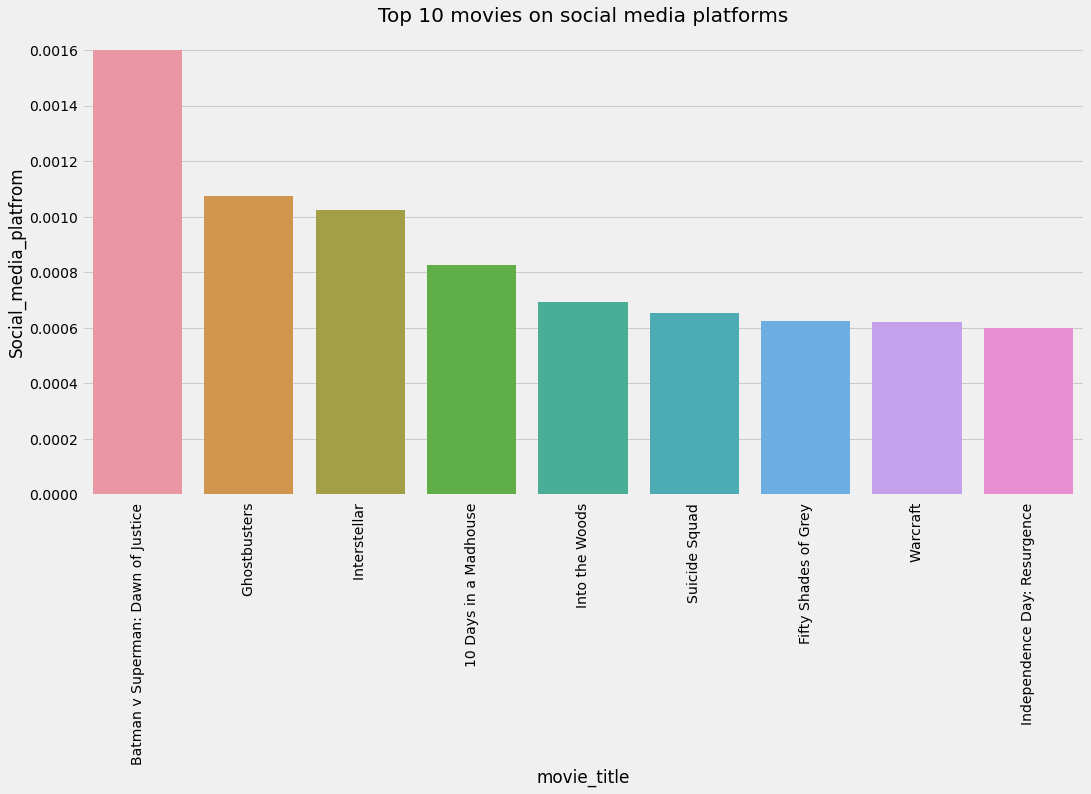

In [28]:
sns.barplot(x["movie_title"],x["Social_media_platfrom"])
plt.title("Top 10 movies on social media platforms",fontsize=20)
plt.xticks(rotation=90,fontsize=14)
plt.show()

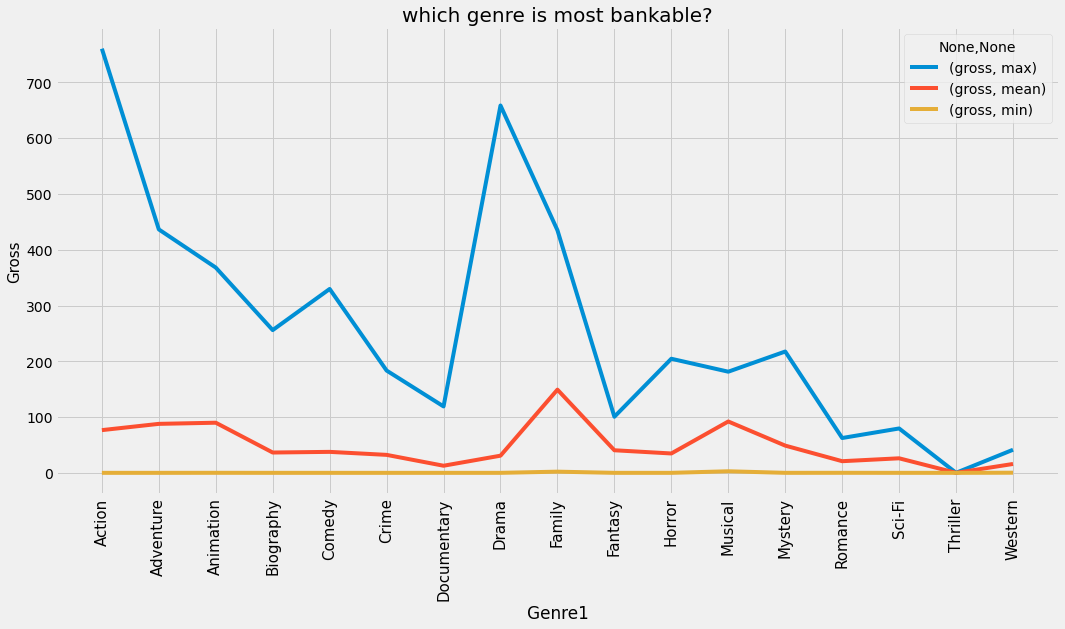

In [29]:
## let's compare gross with genres


display(data[["Genre1","gross"]].groupby(["Genre1"]).agg(["max","mean","min"]).style.background_gradient(cmap="Wistia"))

##let's plot the graph
data[['Genre1','gross']].groupby(['Genre1']).agg(['max','mean','min']).plot(kind='line')
plt.title("which genre is most bankable?",fontsize=20)
plt.xticks(np.arange(17),['Action','Adventure','Animation','Biography','Comedy',
                          'Crime','Documentary','Drama','Family','Fantasy','Horror','Musical',
                          'Mystery','Romance','Sci-Fi','Thriller','Western'],rotation=90,fontsize=15)
plt.ylabel("Gross",fontsize=15)
plt.show()


In [30]:
print("The most profitable Movie from each genre")

display(data.loc[data.groupby(data["Genre1"])['Profit'].idxmax()][["Genre1","movie_title","gross"]].style.background_gradient(cmap='copper'))

The most profitable Movie from each genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [31]:
## Loss and profit analysis on English and foreign movies
data["title_year"]=data["title_year"].astype("int")

In [36]:
print("Most profitable movies in boxoffice!")
display(data[["title_year","language","Profit","movie_title"]].groupby(["language","title_year","movie_title"]).agg('sum').sort_values(by="Profit",
        ascending=False).head(20).style.background_gradient(cmap="Greens"))

Most profitable movies in boxoffice!


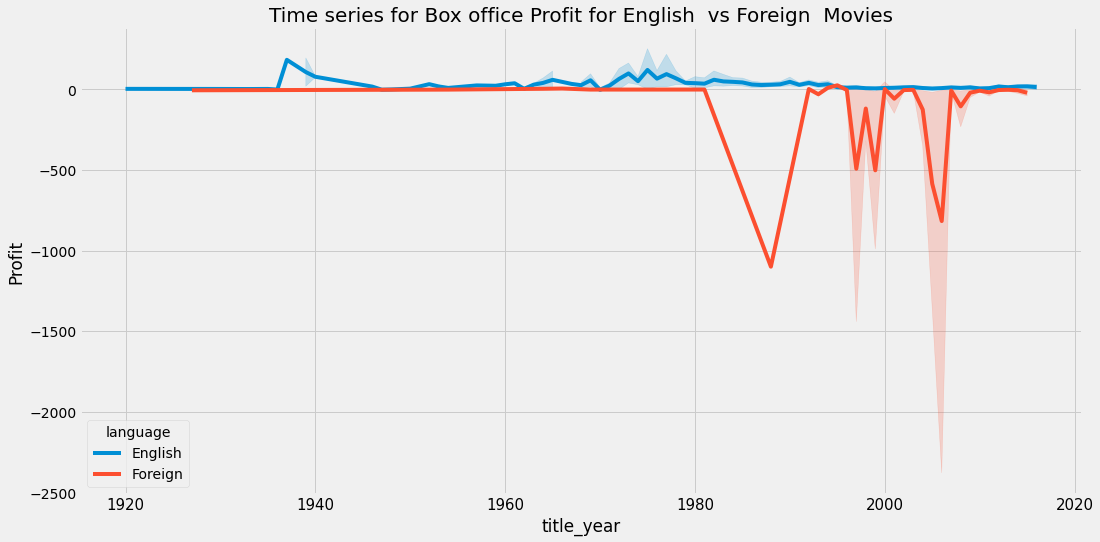

In [34]:
sns.lineplot(data["title_year"],data["Profit"],hue=data["language"])
plt.title("Time series for Box office Profit for English  vs Foreign  Movies",fontsize=20)
plt.xticks(fontsize=15)
plt.show()

In [35]:
print("Movie that went huge losses")

display(data[data["Profit"]<-2000][["movie_title","language","Profit"]].style.background_gradient(cmap="Reds"))

Movie that went huge losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [35]:

display(data[data["duration"]=="long"][["movie_title","title_year",
      "duration","gross","Profit"]].sort_values(by="Profit",ascending=False).head(5).style.background_gradient(cmap="spring"))
       


,movie_title,title_year,duration,gross,Profit
0,Avatar,2009,long,760.505847,523.505847
29,Jurassic World,2015,long,652.177271,502.177271
26,Titanic,1997,long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,1977,long,460.935665,449.935665
17,The Avengers,2012,long,623.279547,403.279547


In [34]:
       
display(data[data["duration"]=="short"][["movie_title",
      "duration","gross","Profit"]].sort_values(by="Profit",ascending=False).head(5).style.background_gradient(cmap="spring"))
       

,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,short,434.949459,424.449459
509,The Lion King,short,422.783777,377.783777
812,Deadpool,short,363.024263,305.024263
521,Despicable Me 2,short,368.049635,292.049635
338,Finding Nemo,short,380.838870,286.838870


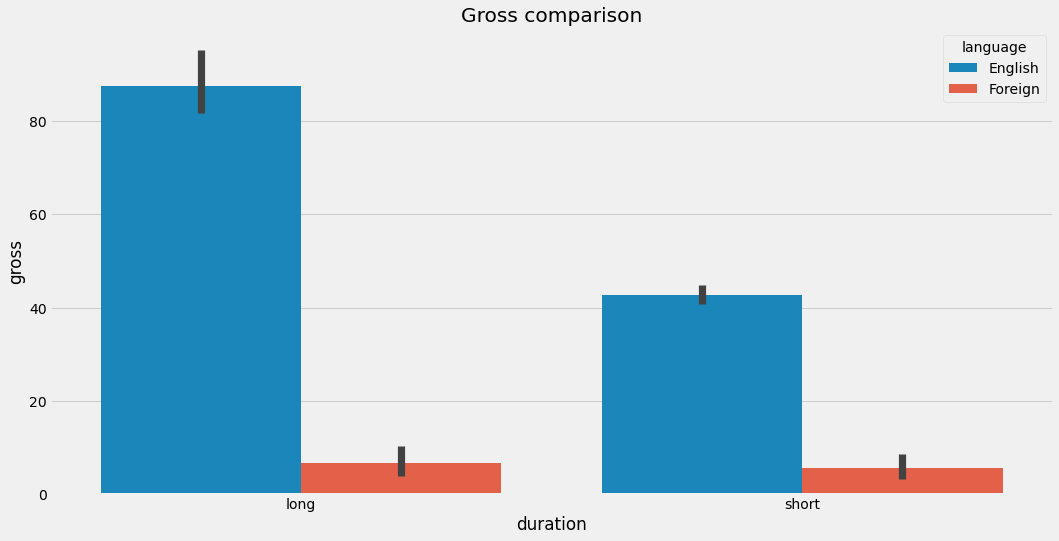

In [38]:
sns.barplot(data["duration"],data["gross"],hue=data["language"])
plt.title("Gross comparison")
plt.show()

In [39]:
##Analysing the IMDB score for long and short duratoin movies

print("Average IMDB score for Long Duration movies is->{0:0.2f}".format(data[data["duration"]=="long"]["imdb_score"].mean()))
print("Average IMDB score for Short Duration movies is->{0:0.2f}".format(data[data["duration"]=="short"]["imdb_score"].mean()))

Average IMDB score for Long Duration movies is->7.06
Average IMDB score for Short Duration movies is->6.28


In [40]:
print("\nHighest Rated long duration movies\n",data[data["duration"]=="long"][["movie_title",
     "imdb_score"]].sort_values(by="imdb_score",ascending=False).head(2))
print("-------------------------------------------------")
print("\nHighest Rated short duration movies\n",data[data["duration"]=="short"][["movie_title",
     "imdb_score"]].sort_values(by="imdb_score",ascending=False).head(2))


Highest Rated long duration movies
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3
3466             The Godfather          9.2
-------------------------------------------------

Highest Rated short duration movies
               movie_title  imdb_score
3592  The Usual Suspects          8.6
3175  American History X          8.6


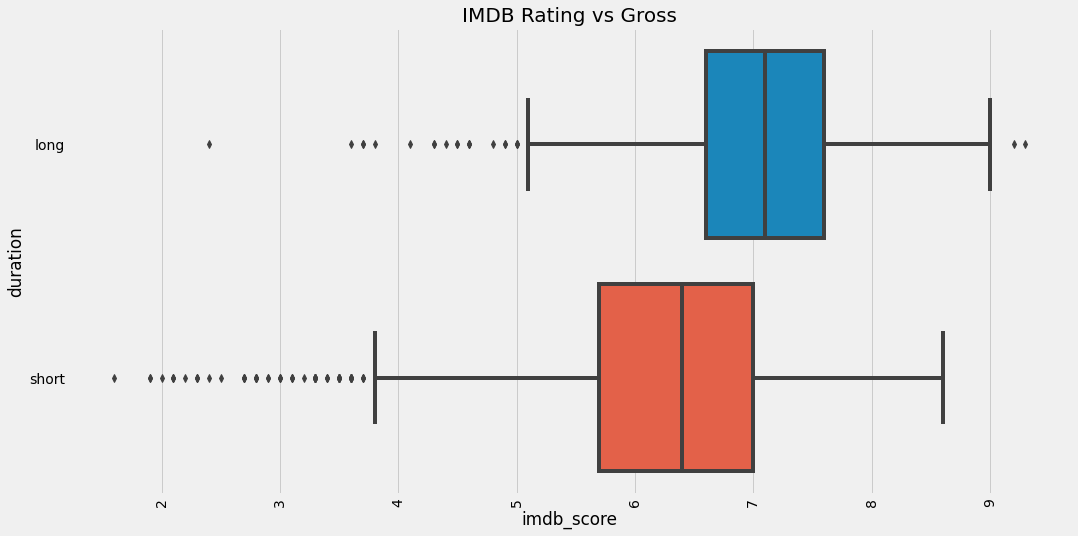

In [41]:
sns.boxplot(data["imdb_score"],data["duration"])
plt.title("IMDB Rating vs Gross",fontsize=20)
plt.xticks(rotation=90)
plt.show()


In [42]:
def actor_report(x):
    
    a=data[data["actor_1_name"]==x]
    b=data[data["actor_2_name"]==x]    
    c=data[data["actor_3_name"]==x]
    x=a.append(b)
    y=x.append(c)
    print("Time:",y["title_year"].min(),y["title_year"].max())
    print("MaxGross:{0:.2f} Millions".format(y["gross"].max()))
    print("AvgGross:{0:.2f} Millions".format(y["gross"].mean()))
    print("MinGross:{0:.2f} Millions".format(y["gross"].min()))
    print("Number of  100 Million movies",y[y["gross"]>100].shape[0])
    print("Avg IMDB Score:{0:.2f} Millions".format(y["imdb_score"].mean()))
    print("Most common genre is",y["Genre1"].value_counts().head())
    
    print("Most common genre is",y["Genre2"].value_counts().head())
actor_report('Meryl Streep')

Time: 1985 2014
MaxGross:143.70 Millions
AvgGross:55.23 Millions
MinGross:9.66 Millions
Number of  100 Million movies 4
Avg IMDB Score:6.81 Millions
Most common genre is Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: Genre1, dtype: int64
Most common genre is Drama        11
Romance       3
Thriller      2
Animation     2
Adventure     1
Name: Genre2, dtype: int64


In [43]:
pd.set_option('max_rows',5000)

@interact
def show_movies_more_than(column="imdb_score",score=9.0):
    
    x=data.loc[data[column]>score][["title_year","movie_title","director_name",
                                   "actor_1_name","actor_2_name","actor_3_name",
                                   "Profit","imdb_score"]].sort_values(by="imdb_score",ascending=False)
    x=x.drop_duplicates(keep="first")
    return x
    

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

## Recommending movies based on language and actors

In [44]:
def language_recommendation(x):
    
    
    y=data[["movie_title","language","imdb_score"]][data["language"]==x].sort_values(by="imdb_score",ascending=False)
    return y.head(15)

In [45]:
language_recommendation('Foreign')

,movie_title,language,imdb_score
4498,"The Good, the Bad and the Ugly",Foreign,8.9
4029,City of God,Foreign,8.7
4747,Seven Samurai,Foreign,8.7
2373,Spirited Away,Foreign,8.6
4921,Children of Heaven,Foreign,8.5
4259,The Lives of Others,Foreign,8.5
3931,Samsara,Foreign,8.5
4659,A Separation,Foreign,8.4
1329,Baahubali: The Beginning,Foreign,8.4
2970,Das Boot,Foreign,8.4


In [46]:
def recommend_movies_on_actor(x):
    
    a=data[["movie_title","imdb_score"]][data["actor_1_name"]==x]
    b=data[["movie_title","imdb_score"]][data["actor_2_name"]==x]
    c=data[["movie_title","imdb_score"]][data["actor_3_name"]==x]
    
    a=a.append(b)
    a=a.append(c)
    a=a.sort_values(by="imdb_score",ascending=False)
    a=a.drop_duplicates(keep="first")
    return a.head(15)

In [47]:
recommend_movies_on_actor("Rory Kinnear")

,movie_title,imdb_score
2614,The Imitation Game,8.1
30,Skyfall,7.8
2,Spectre,6.8
12,Quantum of Solace,6.7


## Recommending movies of similar Genres

In [48]:
from mlxtend.preprocessing import TransactionEncoder

x=data["genres"].str.split("|")
TE=TransactionEncoder()
x=TE.fit_transform(x)
x=pd.DataFrame(x,columns=TE.columns_)
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [52]:
genres=x.astype(int)
genres.head(5)

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
genres.insert(0,"movie_title",data["movie_title"])
genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
genres=genres.set_index("movie_title")
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
def recommendation_genres(ge):
    
    ge=genres[ge]
    similar_genres=genres.corrwith(ge)
    similar_genres=similar_genres.sort_values(ascending=False)
    similar_genres=similar_genres.iloc[1:]
    
    return similar_genres.head(5)

In [58]:
recommendation_genres("Fantasy")

Family       0.343970
Adventure    0.267100
Animation    0.249944
Horror       0.098274
Musical      0.076991
dtype: float64

## Recommending Movies based on Movies

In [61]:
movies=genres.transpose()
movies.head(18)

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN,Moms' Night Out,Donnie Darko,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Crime,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Drama,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,1,0
Family,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Fantasy,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
def recommendation_movies(mo):
    
    mo=movies[mo+'\xa0']
    similar_movie=movies.corrwith(mo)
    similar_movie=similar_movie.sort_values(ascending=False)
    similar_movie=similar_movie.iloc[1:]
    
    return similar_movie.head(10)

In [71]:
recommendation_movies("The Expendables")

movie_title
The Midnight Meat Train            1.0
Street Kings                       1.0
NaN                                1.0
Boogeyman                          1.0
The Last Song                      1.0
Tammy                              1.0
Arthur and the Invisibles          1.0
NaN                                1.0
Jay and Silent Bob Strike Back     1.0
The Animal                         1.0
dtype: float64